### 1. Load model

In [ ]:
%run -i convergence_analysis.py  -a sparsescatnet --scattering-J 4 --scattering-order2 --scattering-wph  \
--L-kernel-size 3 --dictionary-size 2048 --L-proj-size 256 --nb-images 5120 -b 128 --n-iterations 12 \
--model-checkpoint path/to/checkpoint -j 10 path/to/ImageNet

### 2. Compute loss and convergence curves

In [2]:
from convergence_analysis import compute_conv_model, compute_conv_FISTA, compute_conv_ISTA
n_iterations = model.module.istc.n_iterations

loss_curve_FISTA, conv_curve_FISTA = compute_conv_FISTA(model, val_loader, dictionary, 50)
loss_curve_ISTA, conv_curve_ISTA = compute_conv_ISTA(model, val_loader, dictionary, 50)
loss_curve_model, conv_curve_model, support_incl, support_diff, support_size_x_star, support_size_x_star_curve, \
support_size_model = compute_conv_model(model, val_loader, dictionary, w_matrix)

Relative losses

In [3]:
loss_ISTC = loss_curve_model[n_iterations-1]/loss_curve_FISTA[-1]
loss_FISTA = loss_curve_FISTA[n_iterations-1]/loss_curve_FISTA[-1]
loss_ISTA = loss_curve_ISTA[n_iterations-1]/loss_curve_FISTA[-1]
print(loss_ISTC)
print(loss_ISTA)
print(loss_FISTA)

1.0111119050543114
1.1192425504531223
1.0478478228577026


Loss curves

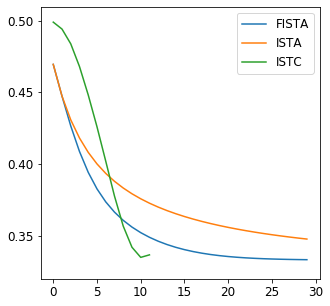

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.arange(30), loss_curve_FISTA[:30], label='FISTA')
plt.plot(np.arange(30), loss_curve_ISTA[:30], label='ISTA')
plt.plot(np.arange(12), loss_curve_model, label='ISTC')
plt.ylim((0.32, loss_curve_ISTA.max()+0.04))
plt.yticks(np.arange(0.35, 0.54, step=0.05))
plt.legend(fontsize=12)
plt.show()

Support and MSE curves

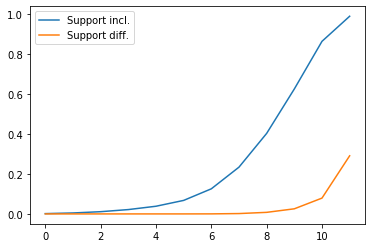

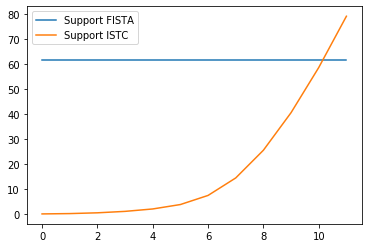

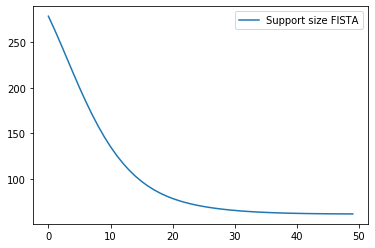

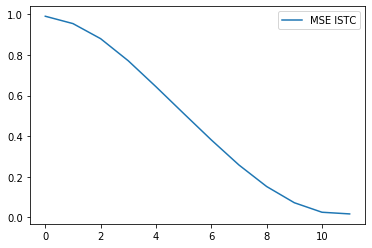

In [5]:
plt.figure(1)
plt.plot(np.arange(n_iterations), support_incl, label='Support incl.')
plt.plot(np.arange(n_iterations), support_diff, label='Support diff.')
plt.legend()
plt.figure(2)
plt.plot(np.arange(n_iterations), support_size_x_star, label='Support FISTA')
plt.plot(np.arange(n_iterations), support_size_model, label='Support ISTC')
plt.legend()
plt.figure(3)
plt.plot(np.arange(50), support_size_x_star_curve[:50], label='Support size FISTA')
plt.legend()
plt.figure(4)
plt.plot(np.arange(n_iterations), conv_curve_model, label='MSE ISTC')
plt.legend()
plt.show()

Print MSE

In [6]:
print(conv_curve_model[n_iterations-1])
print(conv_curve_ISTA[n_iterations-1])
print(conv_curve_FISTA[n_iterations-1])

0.016979753105918167
0.447909765866239
0.23450754025273232


### 3. Coherence

In [7]:
gram_W_T_D = torch.matmul(model.module.istc.w_weight.data[..., 0, 0].t(),
                                          model.module.istc.dictionary_weight.data[..., 0, 0]).cpu()          
gram_W_T_D = torch.abs(gram_W_T_D)
shape = gram_W_T_D.shape[0]
for i in range(shape):
    gram_W_T_D[i, i] = 0

max_coherence = torch.max(gram_W_T_D)

support_size = support_size_model[n_iterations-1]
print(support_size)
print(max_coherence)
# \mu s
print(max_coherence*support_size)

79.10463966836734
tensor(0.7915)
tensor(62.6137)
